## Assignment 2 - Group project - Kaggle Challenge
Team members :

Gobu <br>
Aaron <br>
Bineeth <br>
Anns <br>
Dhanya <br>
Meenakshi<br>


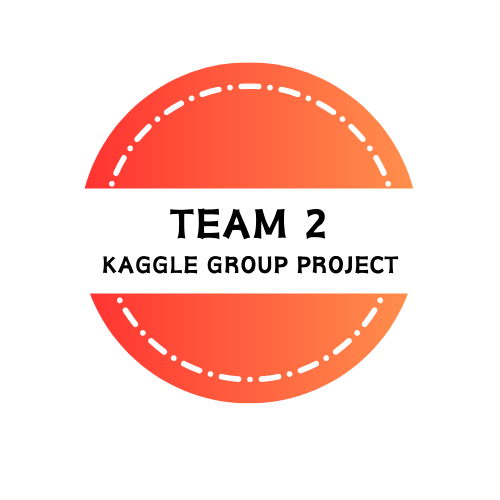

## Load Data

In [1]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f7f3936d57e98f9c431a2e810c4b1905d338df86927fa244a170752b255b159b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# Import relevant modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
import xgboost as xgb
import lime
import lime.lime_tabular
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox

In [3]:
# Set seaborn theme for  the plots
sns.set_theme(style="darkgrid")

In [4]:
# Load data as a dataframe from our github organization
# Train dataframe
train_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/train.csv'
df = pd.read_csv(train_data)

# Test dataframe
test_data = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group-G/Kaggle-challenge-team-2/main/test.csv'
test_df = pd.read_csv(test_data)
test_df2 = test_df.copy()

# Display first few rows
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [5]:
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [6]:
df.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True

## EDA

In [7]:
# Display more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
# Describe the dataset
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [10]:
# Display shape of dataset
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (8693, 14)


Transported
True     4378
False    4315
Name: count, dtype: int64


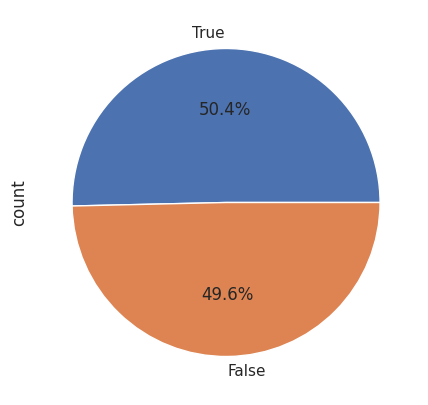

In [11]:
# Plot pie chart
plot_df = df.Transported.value_counts()
print(plot_df)
plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='')
plt.show()

In [12]:
# Slice only the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Print the numerical features
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


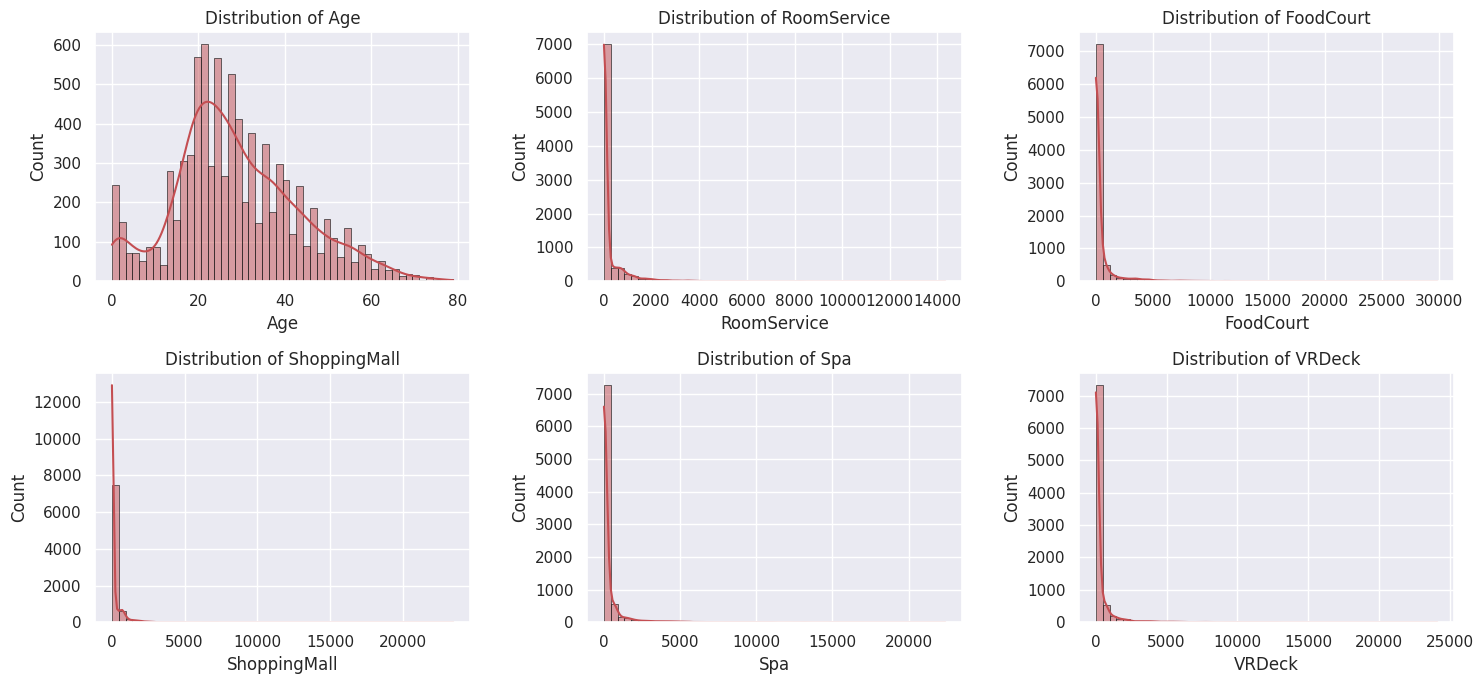

In [13]:
# Plot distribution of each numerical feature
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each numerical feature and plot
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], color='r', edgecolor='k', kde=True, bins=50,
                 ax=ax[i])
    ax[i].set_title('Distribution of ' + str(feature))

plt.tight_layout()
plt.show()

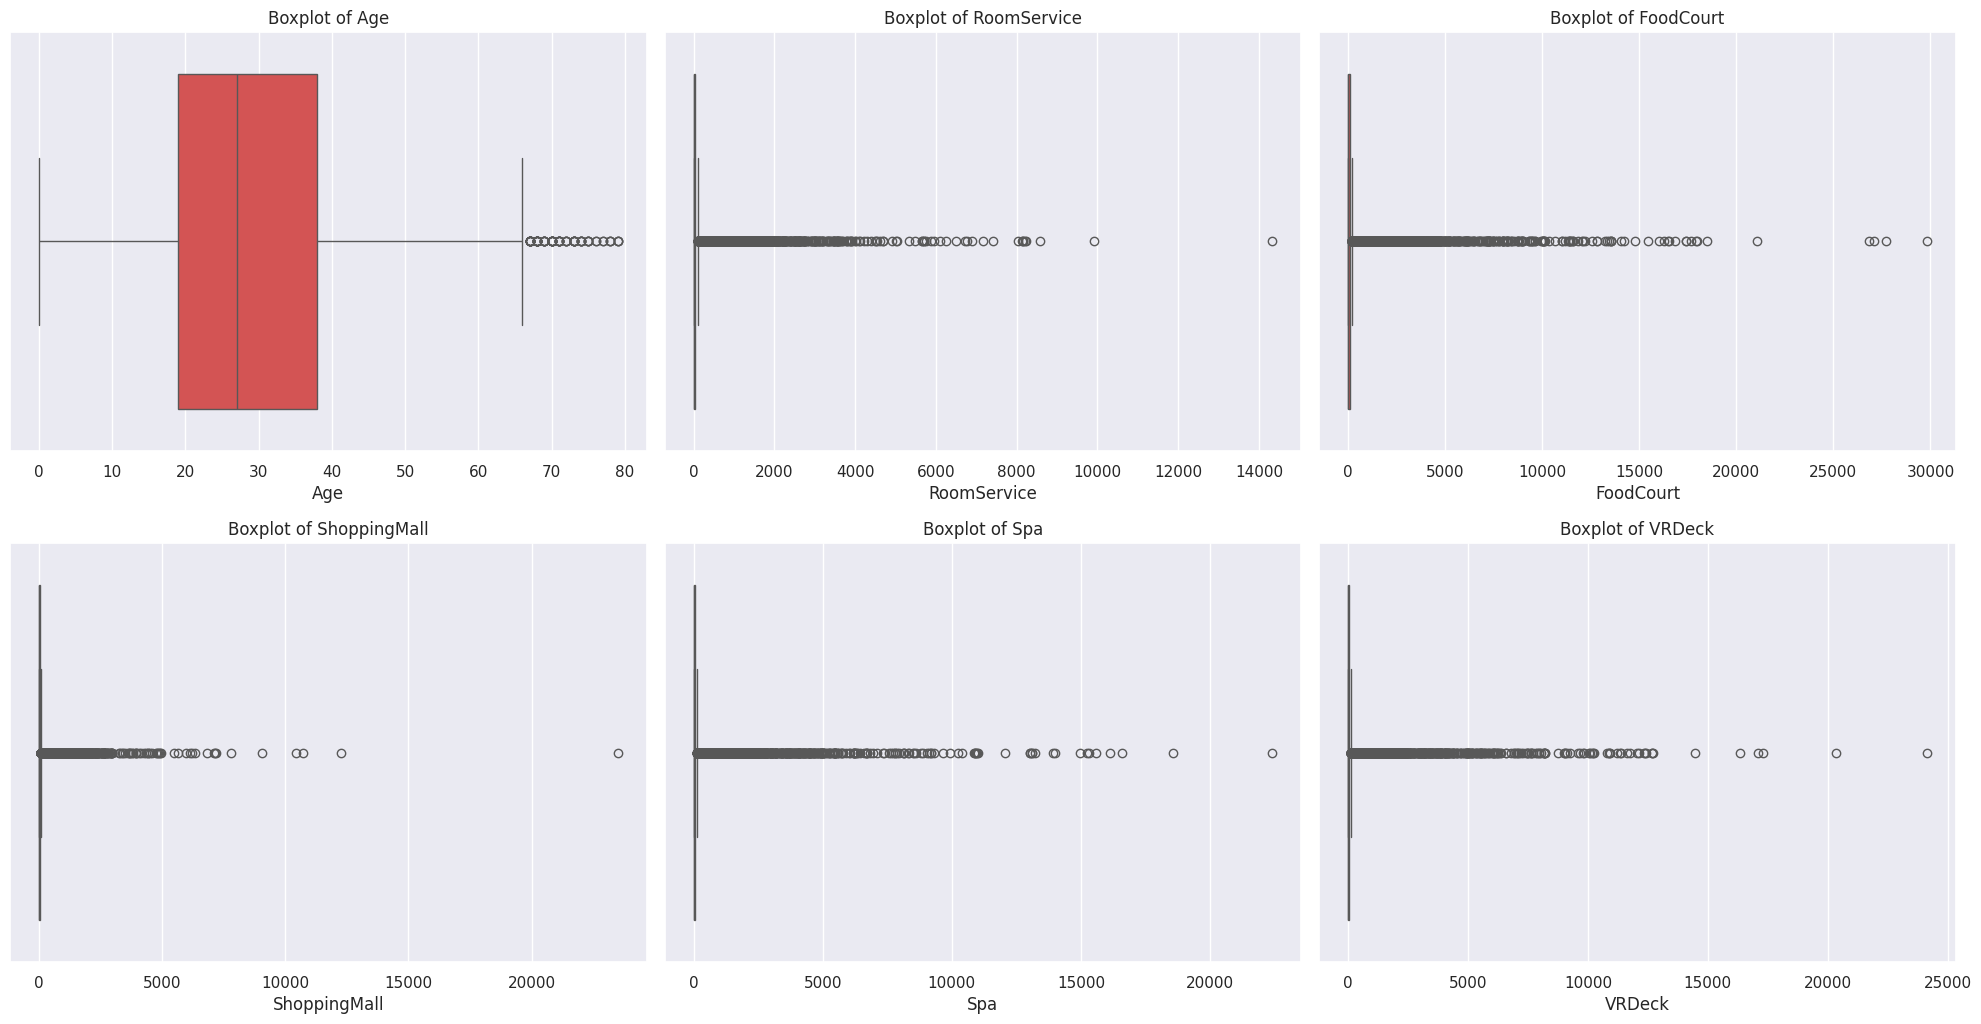

In [14]:
# Plotting boxplots for all numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df[col],
                color=sns.color_palette('rocket', as_cmap=True)(0.6))
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

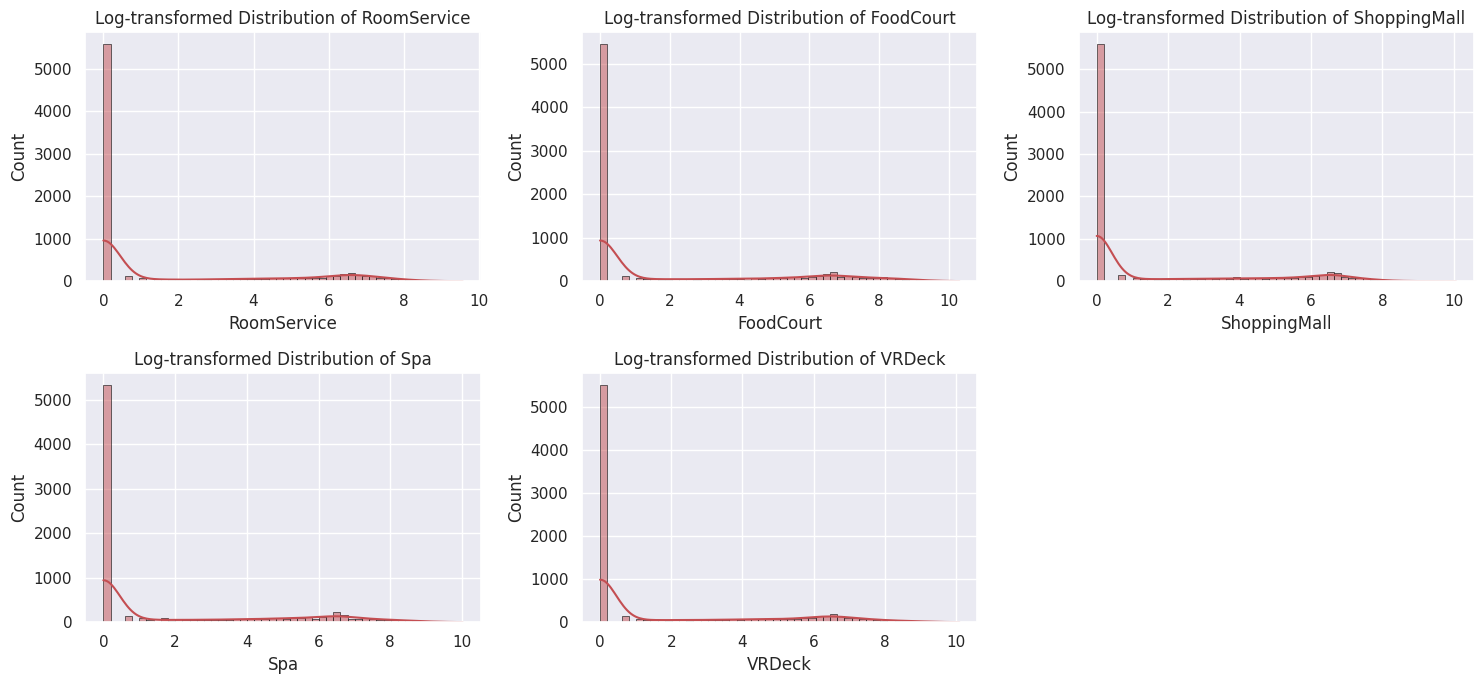

In [15]:
# Plot log-tranformed distribution of each numerical feature except 'Age'
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each numerical feature and plot the log transformation,
# except for 'Age'
plot_index = 0
for feature in numerical_features:
    if feature != 'Age':
        sns.histplot(np.log(df[feature] + 1), color='r', edgecolor='k',
                     kde=True, bins=50, ax=ax[plot_index])
        ax[plot_index].set_title('Log-transformed Distribution of ' +
                                 str(feature))
        plot_index += 1

# Remove the last subplot
fig.delaxes(ax[-1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

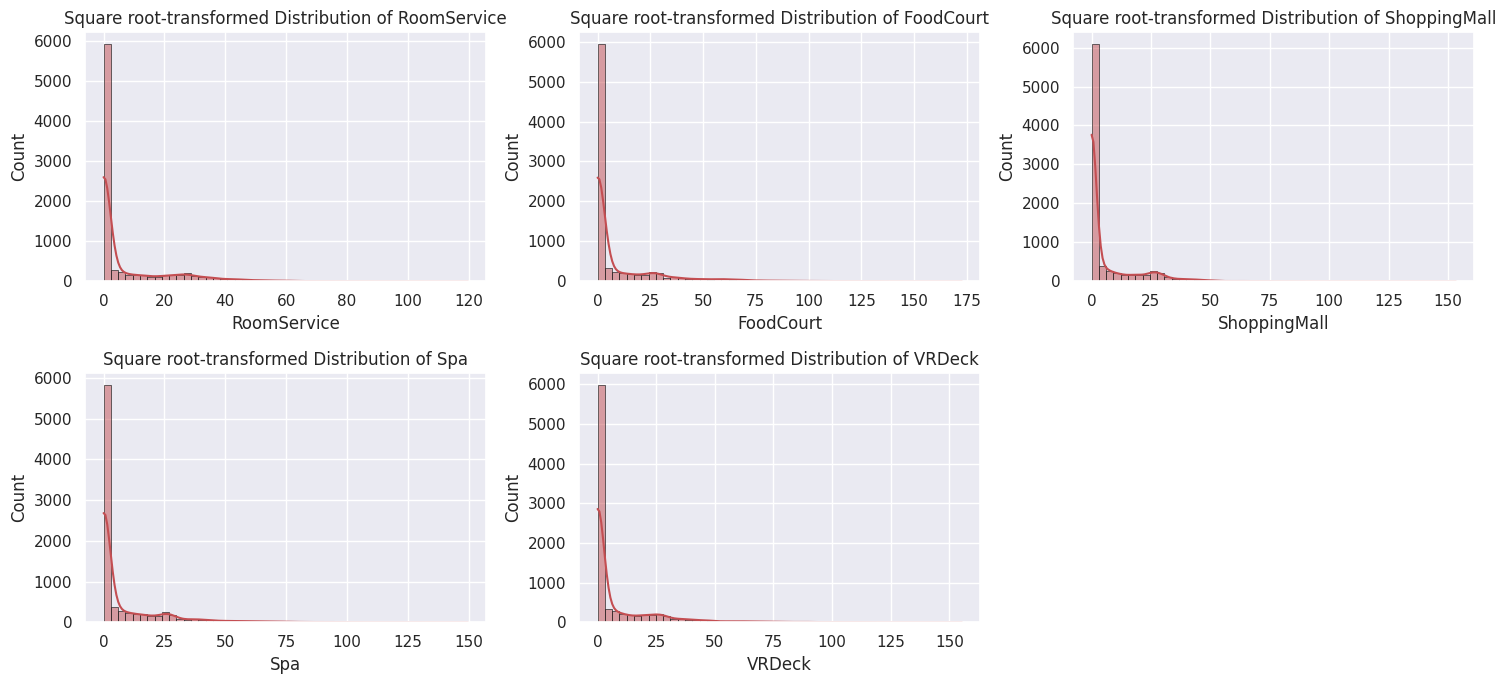

In [16]:
# Plot square-root transformed distribution of numerical features except 'Age'
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each numerical feature and plot the square root transformation,
# except for 'Age'
plot_index = 0
for feature in numerical_features:
    if feature != 'Age':
        sns.histplot(np.sqrt(df[feature]), color='r', edgecolor='k', kde=True,
                     bins=50, ax=ax[plot_index])
        ax[plot_index].set_title('Square root-transformed Distribution of ' +
                                 str(feature))
        plot_index += 1

# Remove the last subplot
fig.delaxes(ax[-1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

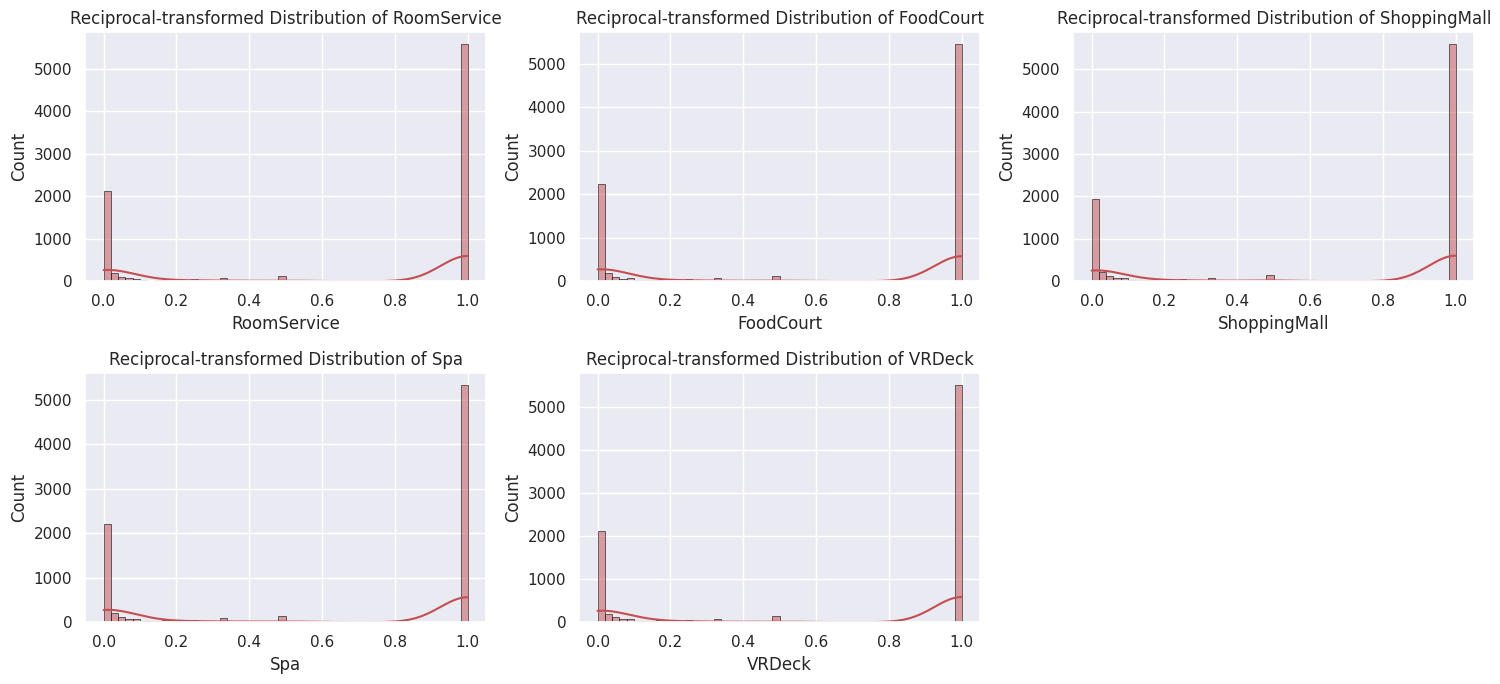

In [17]:
# Plot reciprocal transformed distribution of numerical features except 'Age'
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each numerical feature and plot the reciprocal transformation,
# except for 'Age'
plot_index = 0
for feature in numerical_features:
    if feature != 'Age':
        sns.histplot(1 / (df[feature] + 1), color='r', edgecolor='k', kde=True,
                     bins=50, ax=ax[plot_index])
        ax[plot_index].set_title('Reciprocal-transformed Distribution of ' +
                                 str(feature))
        plot_index += 1

# Remove the last subplot
fig.delaxes(ax[-1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Lambda value for Age: 0.7646660478604062
Lambda value for RoomService: -0.4493426458411099
Lambda value for FoodCourt: -0.3990318184679081
Lambda value for ShoppingMall: -0.49310431087341916
Lambda value for Spa: -0.40359952225075474
Lambda value for VRDeck: -0.43719982319025175


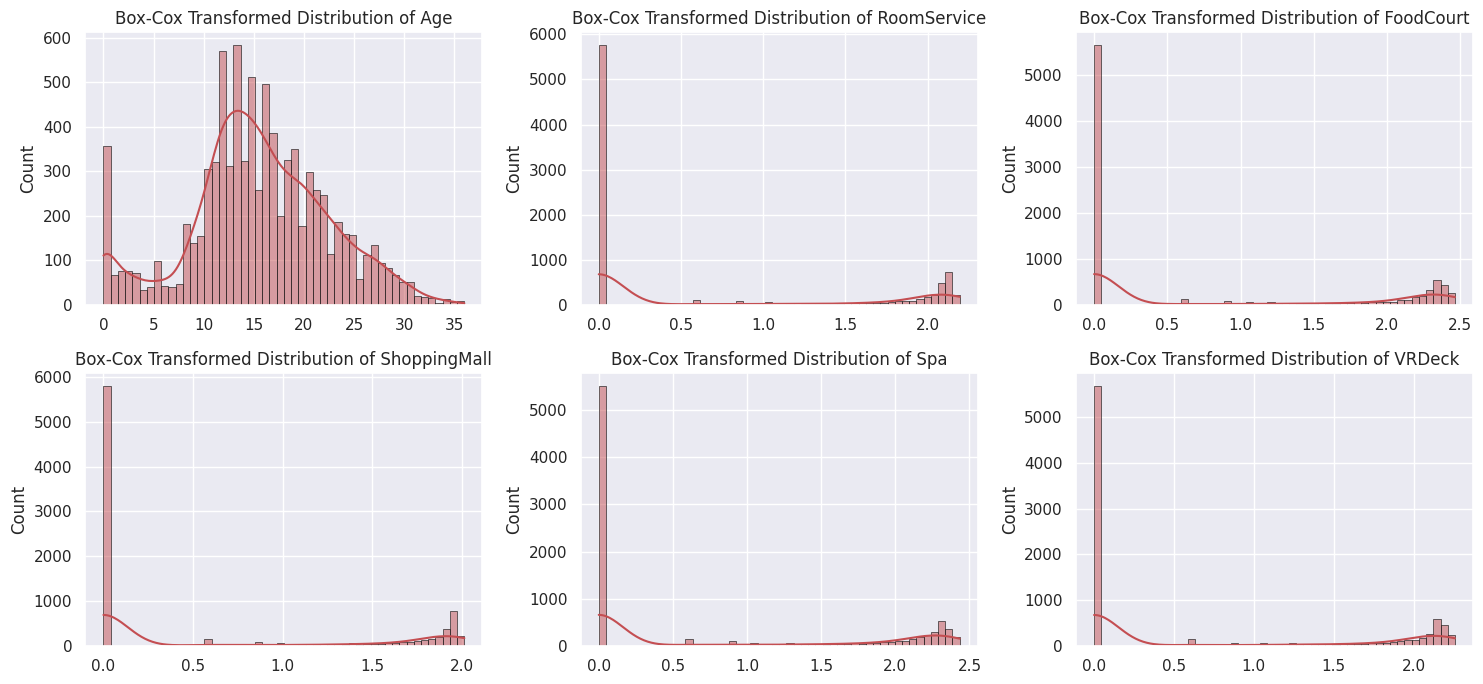

In [18]:
# Plot Box-Cox transformed distribution of numerical features
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each numerical feature and plot the Box-Cox transformation
for i, feature in enumerate(numerical_features):
    # Fill null values
    filled_data = df[feature].fillna(0)

    # Apply Box-Cox transformation
    transformed_data, lambda_value = boxcox(filled_data + 1)

    sns.histplot(transformed_data, color='r', edgecolor='k', kde=True,
                 bins=50, ax=ax[i])
    ax[i].set_title(f'Box-Cox Transformed Distribution of {feature}')

    # Print the lambda value
    print(f'Lambda value for {feature}: {lambda_value}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# Plot a treemap with herirarchies 'Transported','HomePlanet' and 'Destination'
fig = px.treemap(df.dropna(axis=0),
                 path=['Transported','HomePlanet','Destination'],
                 color='Age')
fig.show()

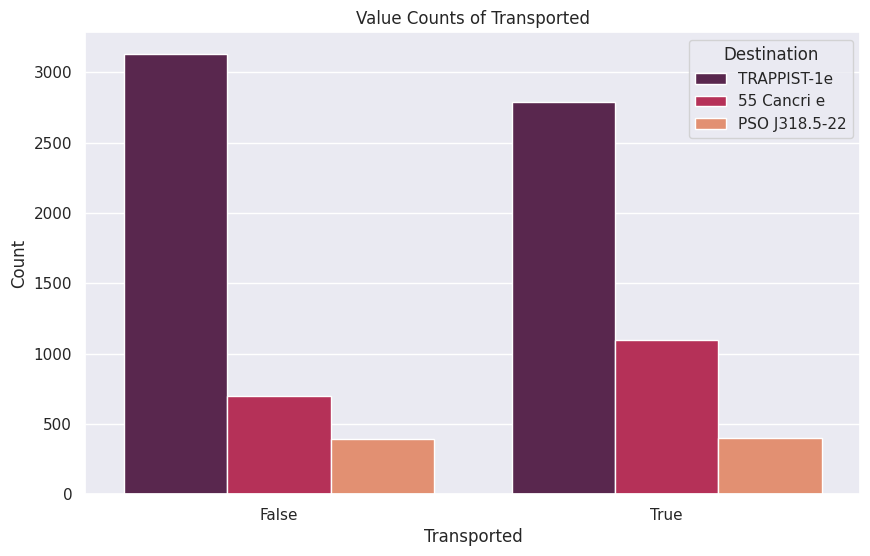

In [20]:
# Plot the value counts for transpotted with hue destination
plt.figure(figsize=(10, 6))
sns.countplot(x='Transported', hue='Destination', data=df, palette='rocket')
plt.title('Value Counts of Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

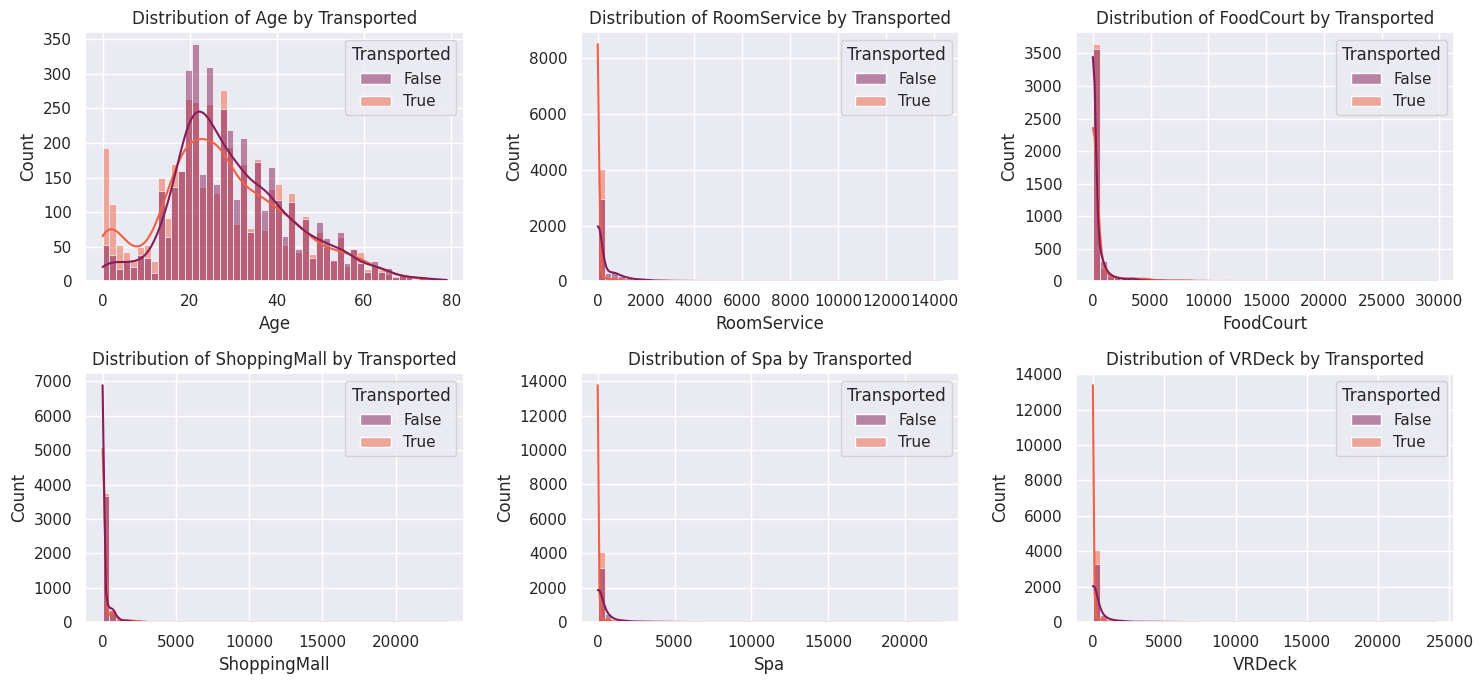

In [21]:
# Distribution of numerical features with hue transported
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Loop through each feature and plot
for i, feature in enumerate(numerical_features):
    sns.histplot(df, x=feature, hue='Transported', kde=True, palette='rocket',
                 bins=50, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature} by Transported')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


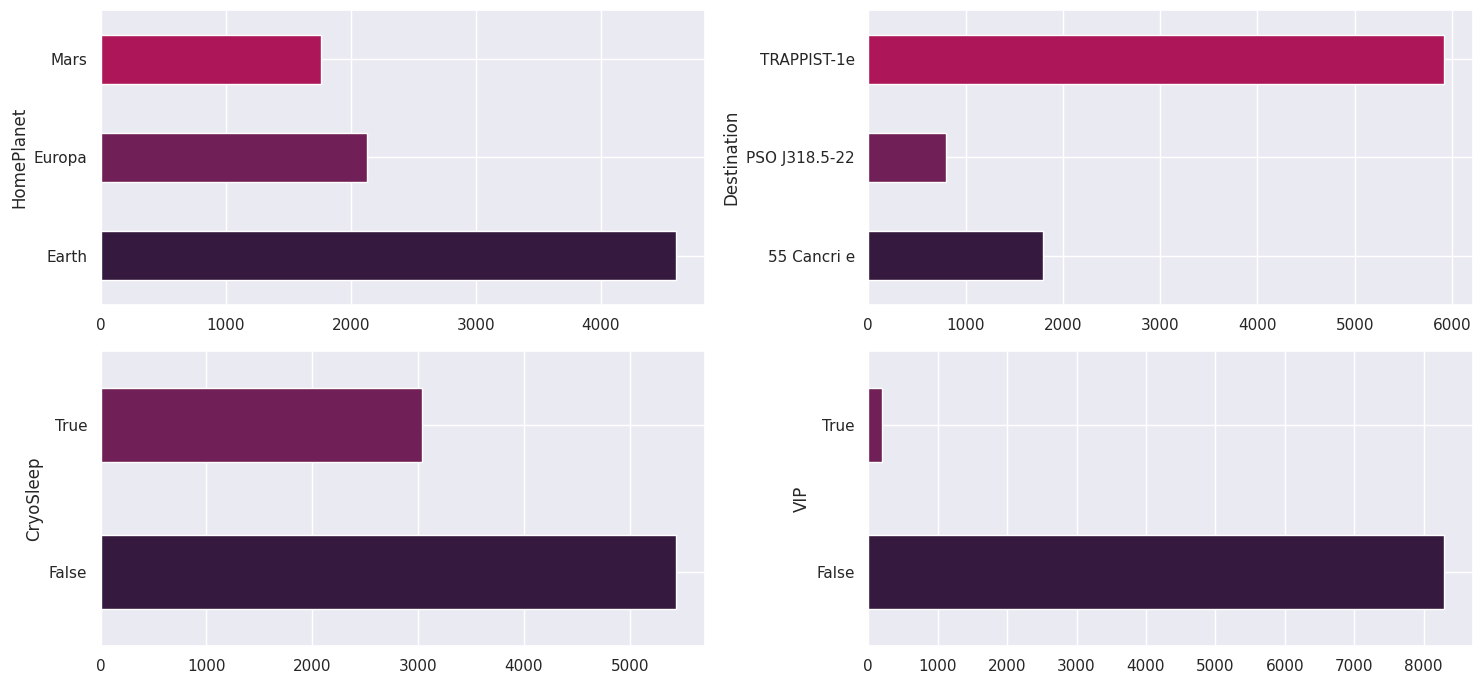

In [22]:
# Plot horizontal bar plot of each categorical feature
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

df.groupby('HomePlanet').size().plot(kind='barh',
                                     color=sns.palettes.mpl_palette('rocket'),
                                     ax=ax[0, 0])
df.groupby('Destination').size().plot(kind='barh',
                                      color=sns.palettes.mpl_palette('rocket'),
                                      ax=ax[0, 1])
df.groupby('CryoSleep').size().plot(kind='barh',
                                    color=sns.palettes.mpl_palette('rocket'),
                                    ax=ax[1, 0])
df.groupby('VIP').size().plot(kind='barh',
                              color=sns.palettes.mpl_palette('rocket'),
                              ax=ax[1, 1])

plt.tight_layout()
plt.show()


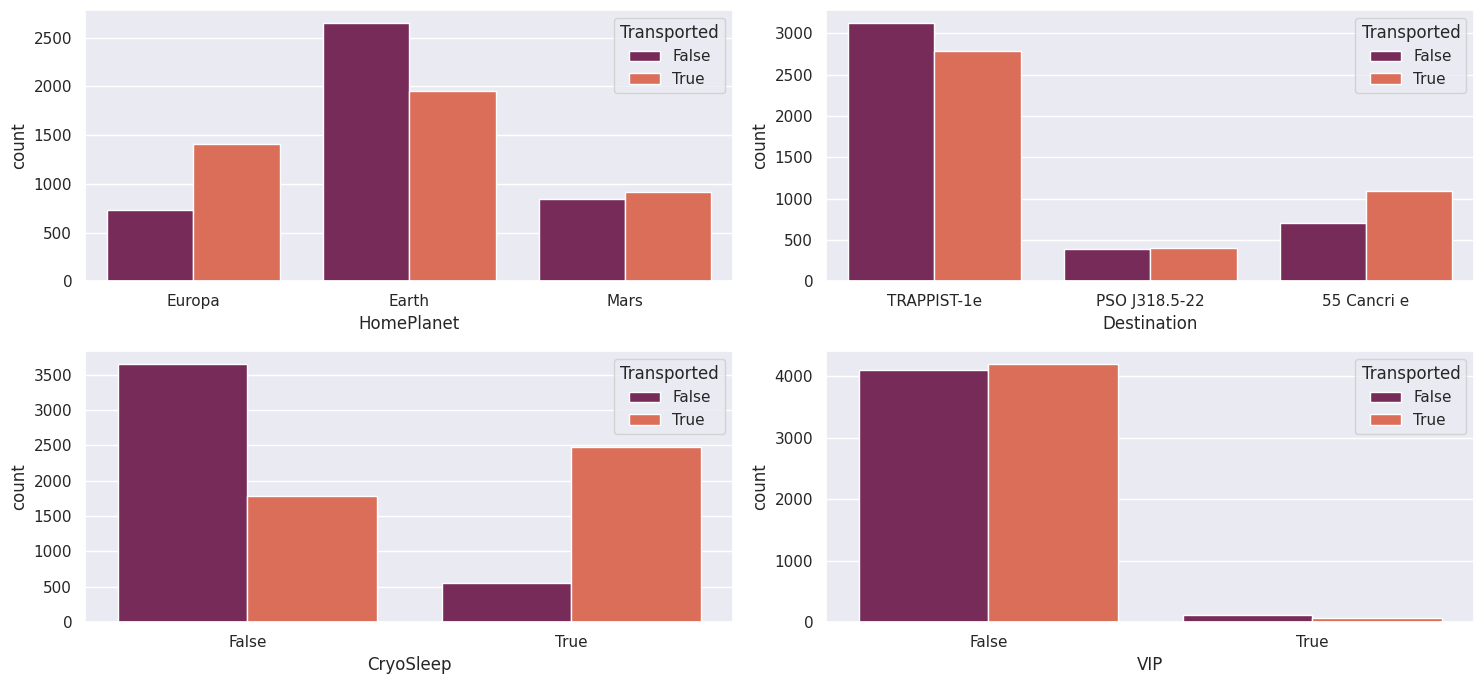

In [23]:
# Plot bar plot of each categorical feature with hue transported
fig, ax = plt.subplots(2, 2, figsize=(15, 7))

sns.countplot(x='HomePlanet', hue='Transported', data=df, palette='rocket',
                                     ax=ax[0, 0])
sns.countplot(x='Destination', hue='Transported', data=df, palette='rocket',
                                     ax=ax[0, 1])
sns.countplot(x='CryoSleep', hue='Transported', data=df, palette='rocket',
                                     ax=ax[1, 0])
sns.countplot(x='VIP', hue='Transported', data=df, palette='rocket',
                                     ax=ax[1, 1])

plt.tight_layout()
plt.show()

In [24]:
# Create a normalized cross-tabulation of 'VIP' and 'Transported' columns
pd.crosstab(df['VIP'], df['Transported'], normalize=True, margins=True)

Transported     False      True       All
VIP                                      
False        0.482097  0.494464  0.976561
True         0.014488  0.008952  0.023439
All          0.496584  0.503416  1.000000

In [25]:
# Drop 'VIP' column from both 'df' and 'test_df'
df.drop(['VIP'], axis=1, inplace=True)
test_df.drop(['VIP'], axis=1, inplace=True)

Splitting 'Cabin' column

In [26]:
# Preprocess the 'Cabin' column
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df.drop(columns=['Cabin'], inplace=True)

In [27]:
# same for test dataset
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [28]:
# Fill missing values in 'Num' column with 0 and convert to
# integer type for both 'df' and 'test_df'
df['Num'].fillna(0, inplace=True)
df['Num'] = df['Num'].astype(int)

test_df['Num'].fillna(0, inplace=True)
test_df['Num'] = test_df['Num'].astype(int)

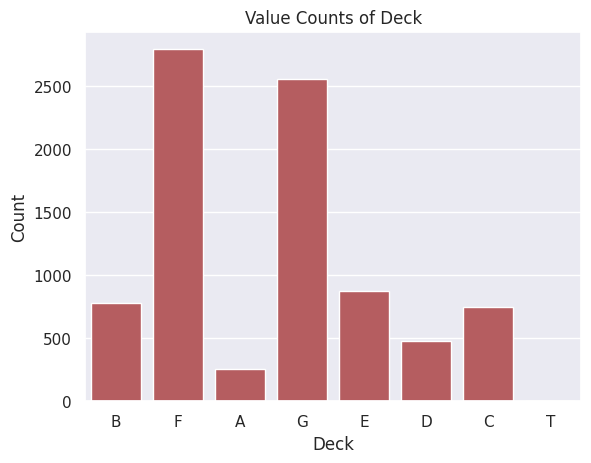

In [29]:
# Plot count of occurrences for each category in 'Deck' column
sns.countplot(x='Deck', data=df, color='r')
plt.title('Value Counts of Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.show()

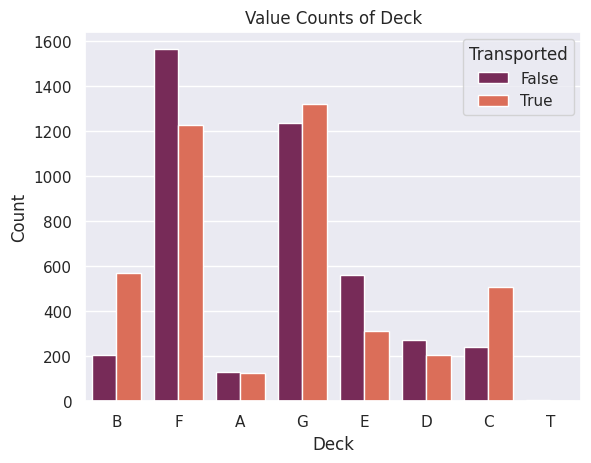

In [30]:
# Plot count of occurrences for each category in 'Deck' column,
# with hue by 'Transported'
sns.countplot(x='Deck', hue='Transported', data=df, palette='rocket')
plt.title('Value Counts of Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

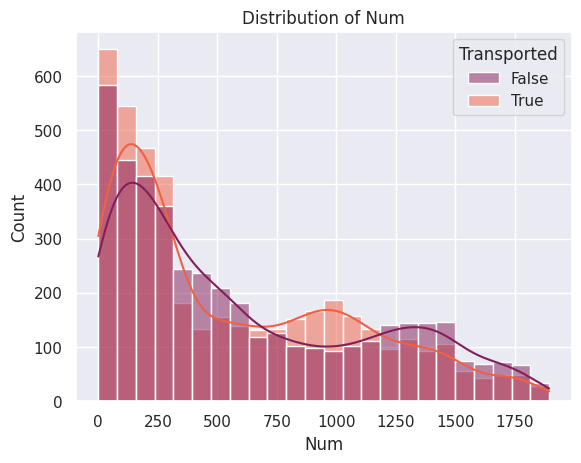

In [31]:
# Plot distribution of 'Num' column with hue by 'Transported'
sns.histplot(data=df, x='Num', hue='Transported', kde=True, palette='rocket')
plt.title('Distribution of Num')
plt.xlabel('Num')
plt.ylabel('Count')
plt.show()


In [32]:
# Plot a treemap with herirarchies 'Transported','Deck' and 'Side'
fig = px.treemap(df.dropna(axis=0), path=['Transported', 'Deck', 'Side'],
                 color='Age')
fig.show()

In [33]:
# Count and sort missing values in each column of 'df' in descending order
df.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
HomePlanet      201
Name            200
Deck            199
Side            199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
Num               0
dtype: int64

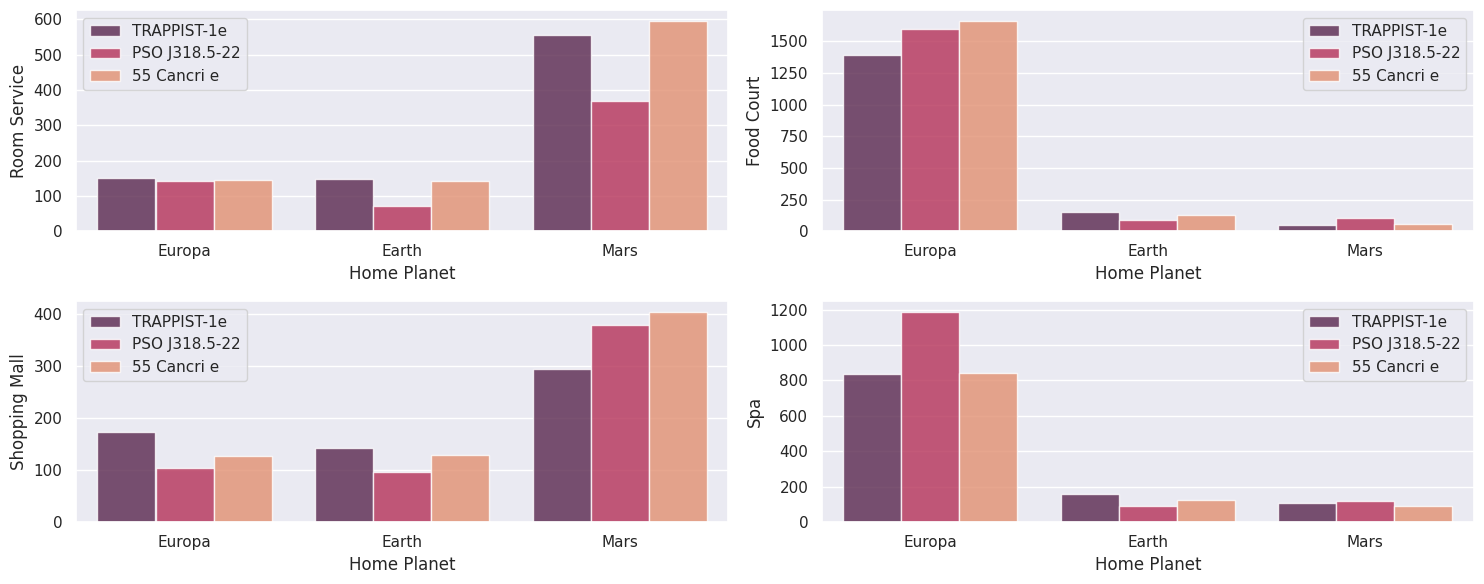

In [34]:
# Plotting distribution of amenities value by homePlanet
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.barplot(
    data=df, x="HomePlanet", y="FoodCourt", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[0,1],
    )
sns.barplot(
    data=df, x="HomePlanet", y="RoomService", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[0, 0]
    )
sns.barplot(
    data=df,x="HomePlanet", y="ShoppingMall", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax=axes[1, 0]
    )
sns.barplot(
    data=df, x="HomePlanet", y="Spa", hue="Destination",
    errorbar=None, palette='rocket', alpha=0.8, ax = axes[1,1]
    )
axes[0,0].legend(title="")
axes[0,1].legend(title="")
axes[1,0].legend(title="")
axes[1,1].legend(title="")
axes[0,0].set_xlabel("Home Planet")
axes[0,0].set_ylabel("Room Service")
axes[0,1].set_xlabel("Home Planet")
axes[0,1].set_ylabel("Food Court")
axes[1,0].set_xlabel("Home Planet")
axes[1,0].set_ylabel("Shopping Mall")
axes[1,1].set_xlabel("Home Planet")

plt.tight_layout()
plt.show()

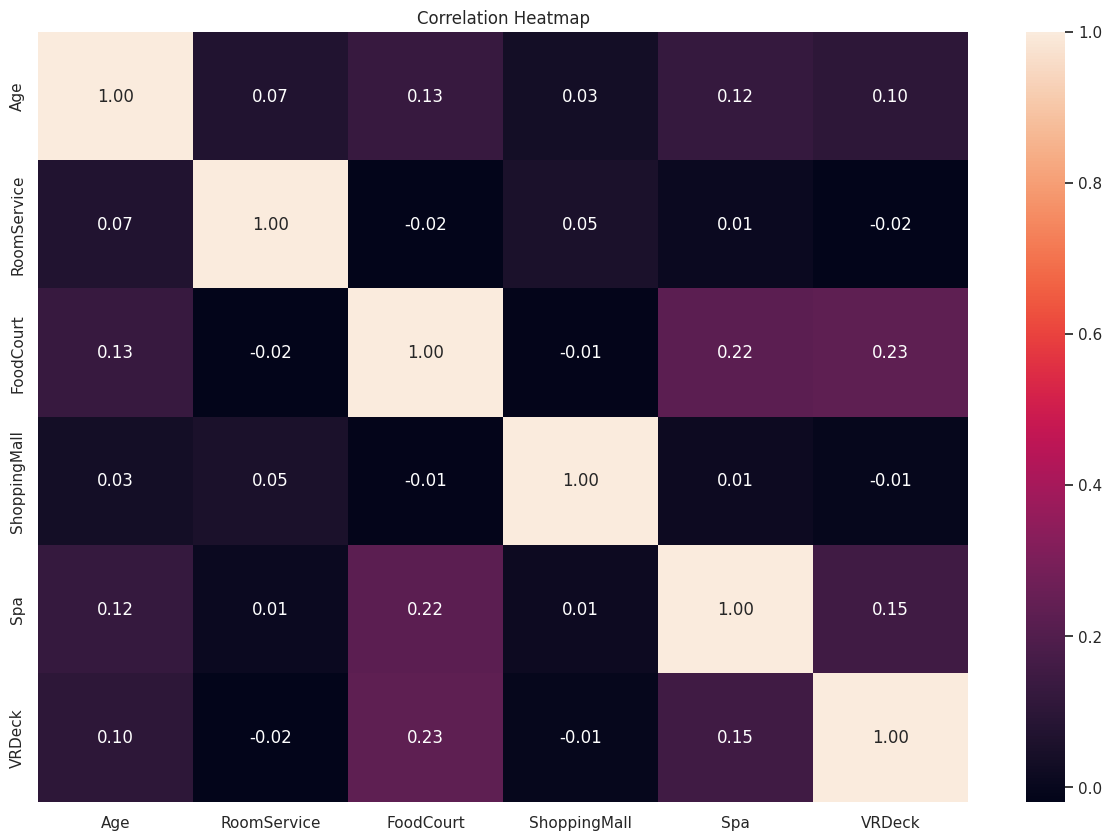

In [35]:
# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Display the number of unique values for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

print("Unique Values in Categorical Features:")
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Values in Categorical Features:
PassengerId: 8693 unique values
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Destination: 3 unique values
Name: 8473 unique values
Deck: 8 unique values
Side: 2 unique values


In [37]:
# Convert categorical columns to category dtype
for col in categorical_features:
    df[col] = df[col].astype('category')

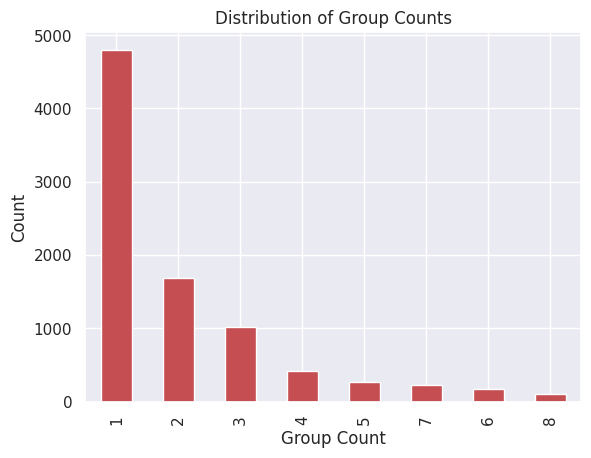

In [38]:
# Extract the group part (gggg) from the "PassengerId"
df["Group"] = df["PassengerId"].str.split("_").str[0]

# Create a new column "groupcount" with the count of passengers in each group
group_counts = df["Group"].value_counts()
df["groupcount"] = df["Group"].map(group_counts)

df["SoloTraveler"] = (df["groupcount"] == 1).astype(int)

# Plot the distribution of group counts
df['groupcount'].value_counts().plot(kind = 'bar', color = 'r')
plt.title('Distribution of Group Counts')
plt.xlabel('Group Count')
plt.ylabel('Count')
plt.show()

In [39]:
# Create a cross-tabulation of 'groupcount' and 'Transported' columns with margins
pd.crosstab(df['groupcount'], df['Transported'], margins=True)


Transported  False  True   All
groupcount                    
1             2631  2174  4805
2              777   905  1682
3              415   605  1020
4              148   264   412
5              108   157   265
6               67   107   174
7              106   125   231
8               63    41   104
All           4315  4378  8693

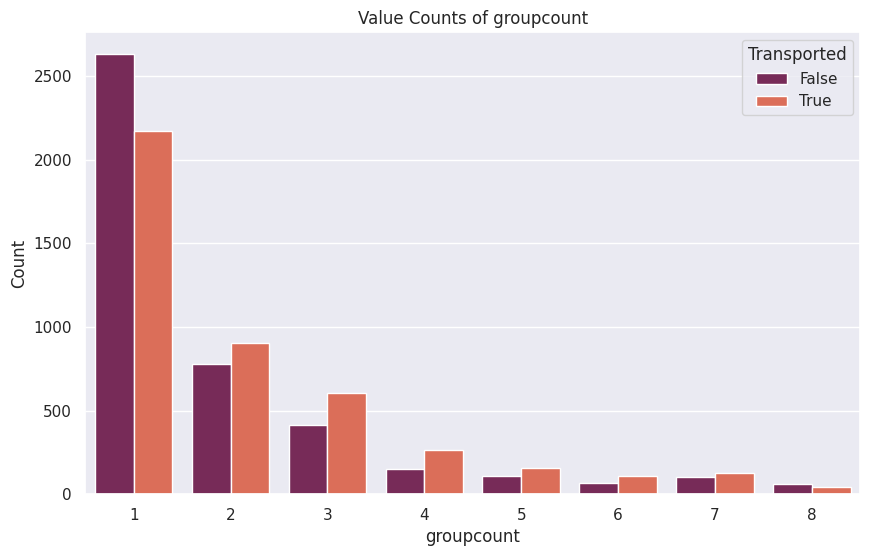

In [40]:
# Plot the count of occurrences for each category in 'groupcount' column,
# with hue by 'Transported'
plt.figure(figsize=(10, 6))
sns.countplot(x='groupcount', hue='Transported', data=df, palette='rocket')
plt.title('Value Counts of groupcount')
plt.xlabel('groupcount')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [41]:
# Drop columns 'Group' and 'groupcount' from 'df'
df.drop(['Group', 'groupcount'], axis=1, inplace=True)


In [42]:
# Extract the group part (gggg) from the "PassengerId"
test_df["Group"] = test_df["PassengerId"].str.split("_").str[0]

# Create a new column "groupcount" with the count of passengers in each group
group_counts = test_df["Group"].value_counts()
test_df["groupcount"] = test_df["Group"].map(group_counts)

test_df["SoloTraveler"] = (test_df["groupcount"] == 1).astype(int)

test_df.drop(['Group', 'groupcount'], axis=1, inplace=True)

In [43]:
# Dropping SoloTraveler column as it was only needed for EDA
df.drop(['SoloTraveler'], axis=1, inplace=True)
test_df.drop(['SoloTraveler'], axis=1, inplace=True)

## Preprocessing

Dropping features. <br>

In [44]:
# Number of non-unique values in 'PassengerId' column
num_non_unique_passenger_id = df.shape[0] - df['PassengerId'].nunique()
print(f"Number of non-unique values in 'PassengerId' column: {num_non_unique_passenger_id}")

# Number of non-unique values in 'Name' column
num_non_unique_name = df.shape[0] - df['Name'].nunique()
print(f"Number of non-unique values in 'Name' column: {num_non_unique_name}")

# Find non-unique names
non_unique_names = df[df.duplicated(subset=['Name'], keep=False)]['Name'].unique()

# Display non-unique names
print("Non-unique names:")
print(non_unique_names)

Number of non-unique values in 'PassengerId' column: 0
Number of non-unique values in 'Name' column: 220
Non-unique names:
[NaN, 'Elaney Webstephrey', 'Keitha Josey', 'Ankalik Nateansive', 'Gollux Reedall', ..., 'Carry Contrevins', 'Asch Stradick', 'Cuses Pread', 'Alraium Disivering', 'Glena Hahnstonsen']
Length: 21
Categories (8473, object): ['Aard Curle', 'Aarjel Jaff', 'Aarjel Rhuba', 'Aark Ches', ...,
                            'Zosmas Ineedeve', 'Zosmas Mormonized', 'Zubeneb Flesping',
                            'Zubeneb Pasharne']


The 'PassengerId' feature is unique for each record and 'Name' column only has 220 non unique entries. Thus these 2 features are irrelevant for our prediction and can be dropped.

In [45]:
# Drop 'Name' and 'PassengerId' columns
df = df.drop(['Name', 'PassengerId'], axis=1)
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side'],
      dtype='object')

In [46]:
# Same for test file
# Drop 'Name' and 'PassengerId' columns
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side'],
      dtype='object')

Encoding

In [47]:
# Convert boolean columns to integers
boolean_columns = ['CryoSleep', 'Transported']
df[boolean_columns] = df[boolean_columns].fillna(False).astype(int)

# Define categorical features to be one-hot encoded
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side']

# Check for missing columns and filter them out
present_categorical_features = [col for col in categorical_features if col in df.columns]

# Apply one-hot encoding to categorical columns with appropriate dtype
df = pd.get_dummies(df,
                    columns=present_categorical_features,
                    prefix=present_categorical_features)

df.head()

CryoSleep   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported  Num  HomePlanet_Earth  ...  Deck_A  Deck_B  Deck_C  Deck_D  \
0            0    0             False  ...   False    True   False   False   
1            1    0              True  ...   False   False   False   False   
2            0    0             False  ...    True   False   False   False   
3            0    0             False  ...    True   False   False   False   
4            1    1              True  ...   False   False   False   False   

   Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0   False   False   False   False    True   False  
1   False    True   False   False   False    True  
2   False   False   False   False   False    True  
3   False   False   False   False   False    True  
4   False    True   False   False   False    True  

[5 rows x 25 columns]

In [48]:
# Same for test_df
# Convert boolean columns to integers
boolean_columns = ['CryoSleep']
test_df[boolean_columns] = test_df[boolean_columns].fillna(False).astype(int)

# Define categorical features to be one-hot encoded
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side']

# Check for missing columns and filter them out
present_categorical_features = [col for col in categorical_features if col in test_df.columns]

# Apply one-hot encoding only to the present columns
test_df = pd.get_dummies(test_df,
                         columns=present_categorical_features,
                         prefix=present_categorical_features, dtype=int)

test_df.head()

CryoSleep   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Num  \
0          1  27.0          0.0        0.0           0.0     0.0     0.0    3   
1          0  19.0          0.0        9.0           0.0  2823.0     0.0    4   
2          1  31.0          0.0        0.0           0.0     0.0     0.0    0   
3          0  38.0          0.0     6652.0           0.0   181.0   585.0    1   
4          0  20.0         10.0        0.0         635.0     0.0     0.0    5   

   HomePlanet_Earth  HomePlanet_Europa  ...  Deck_A  Deck_B  Deck_C  Deck_D  \
0                 1                  0  ...       0       0       0       0   
1                 1                  0  ...       0       0       0       0   
2                 0                  1  ...       0       0       1       0   
3                 0                  1  ...       0       0       1       0   
4                 1                  0  ...       0       0       0       0   

   Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0       0       0       1       0       0       1  
1       0       1       0       0       0       1  
2       0       0       0       0       0       1  
3       0       0       0       0       0       1  
4       0       1       0       0       0       1  

[5 rows x 24 columns]

Scaling

In [49]:
# Import StandardScaler for scaling
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Display the first few rows of the scaled DataFrame
df.head()

CryoSleep       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0          0  0.702095    -0.337025  -0.284274     -0.287317 -0.273736   
1          0 -0.333233    -0.173528  -0.278689     -0.245971  0.209267   
2          0  2.013510    -0.272527   1.934922     -0.287317  5.634034   
3          0  0.287964    -0.337025   0.511931      0.326250  2.655075   
4          0 -0.885407     0.117466  -0.240833     -0.037590  0.223344   

     VRDeck  Transported  Num  HomePlanet_Earth  ...  Deck_A  Deck_B  Deck_C  \
0 -0.266098            0    0             False  ...   False    True   False   
1 -0.227692            1    0              True  ...   False   False   False   
2 -0.223327            0    0             False  ...    True   False   False   
3 -0.097634            0    0             False  ...    True   False   False   
4 -0.264352            1    1              True  ...   False   False   False   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0   False   False   False   False   False    True   False  
1   False   False    True   False   False   False    True  
2   False   False   False   False   False   False    True  
3   False   False   False   False   False   False    True  
4   False   False    True   False   False   False    True  

[5 rows x 25 columns]

In [50]:
# Same for test file
# Scale numerical features
test_df[numerical_features] = scaler.fit_transform(test_df[numerical_features])

Imputing

In [51]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Imputing missing values
# Impute missing values in numerical columns using the median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Verify if there are still any missing values in numerical columns after imputation
print("Missing values after imputing numerical columns:")
print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0])

# Impute missing values in categorical columns using the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['category']).columns

for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

# Verify if there are still any missing values in categorical columns after imputation
print("Missing values after imputing categorical columns:")
print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum() > 0])

# Final check to ensure no missing values are left in the entire dataframe
print("Final check for missing values in the entire dataframe:")
print(df.isnull().sum().sum())

# Display the final shape of the dataset
print(f"Final dataset shape is: {df.shape}")


Missing values in each column:
ShoppingMall    208
VRDeck          188
FoodCourt       183
Spa             183
RoomService     181
Age             179
dtype: int64
Missing values after imputing numerical columns:
Series([], dtype: int64)
Missing values after imputing categorical columns:
Series([], dtype: int64)
Final check for missing values in the entire dataframe:
0
Final dataset shape is: (8693, 25)


In [53]:
# Same for test file
print("Missing values in test_df:")
missing_values = test_df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Imputing missing values in numerical columns using the median
numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    median = test_df[col].median()
    test_df[col].fillna(median, inplace=True)

# Imputing missing values in categorical columns using the mode
categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    mode = test_df[col].mode()[0]
    test_df[col].fillna(mode, inplace=True)

# Final check to ensure no missing values are left in the entire dataframe
print("Final check for missing values in the entire test_df:")
print(test_df.isnull().sum().sum())

# Display the final shape of the test_df
print(f"Final test_df shape is: {test_df.shape}")


Missing values in test_df:
FoodCourt       106
Spa             101
ShoppingMall     98
Age              91
RoomService      82
VRDeck           80
dtype: int64
Final check for missing values in the entire test_df:
0
Final test_df shape is: (4277, 24)


PCA


In [55]:
# Apply PCA
n_components = 0.95  # Retain 95% of the variance
pca = PCA(n_components=n_components)
pca.fit(df[numerical_features])
pca_df = pca.transform(df[numerical_features])
pca_test_df = pca.transform(test_df[numerical_features])

# Convert the transformed data to a DataFrame
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_df, columns=pca_columns)
pca_test_df = pd.DataFrame(pca_test_df, columns=pca_columns)

# Add the PCA components to the original DataFrame
df_pca = df.drop(columns=numerical_features).reset_index(drop=True).join(pca_df)
test_df_pca = test_df.drop(columns=numerical_features).reset_index(drop=True).join(pca_test_df)

# Display the first few rows of the PCA-transformed DataFrame
print("PCA-transformed DataFrame:")
df_pca.head()


PCA-transformed DataFrame:


CryoSleep  Transported  Num  HomePlanet_Earth  HomePlanet_Europa  \
0          0            0    0             False               True   
1          0            1    0              True              False   
2          0            0    0             False               True   
3          0            0    0             False               True   
4          0            1    1              True              False   

   HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0            False                    False                      False   
1            False                    False                      False   
2            False                    False                      False   
3            False                    False                      False   
4            False                    False                      False   

   Destination_TRAPPIST-1e  Deck_A  ...  Deck_G  Deck_T  Side_P  Side_S  \
0                     True   False  ...   False   False    True   False   
1                     True   False  ...   False   False   False    True   
2                     True    True  ...   False   False   False    True   
3                     True    True  ...   False   False   False    True   
4                     True   False  ...   False   False   False    True   

        PC1       PC2       PC3       PC4       PC5       PC6  
0 -0.169900 -0.056553 -0.270649 -0.887051  0.084664 -0.042840  
1 -0.295685 -0.293975 -0.040731  0.102878 -0.363311 -0.214440  
2  4.682985  0.113786 -0.162738 -0.741587 -4.070491 -0.864272  
3  1.733277  0.001136  0.553689  0.034991 -1.970403 -0.683011  
4 -0.487079 -0.165224  0.107531  0.692768 -0.443046 -0.134101  

[5 rows x 25 columns]

In [56]:
# Check columns in test_df_pca to confirm 'Num' exists
print(test_df_pca.columns)

Index(['CryoSleep', 'Num', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
      dtype='object')


##XGBoost classifier model
By Gobu C Babu

###Training for Kaggle submission

Training XGBoost model for Kaggle submission using the dataset with PCA components.

In [57]:
df_xgb = df_pca.copy()

In [58]:
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Transported                8693 non-null   int64  
 2   Num                        8693 non-null   int64  
 3   HomePlanet_Earth           8693 non-null   bool   
 4   HomePlanet_Europa          8693 non-null   bool   
 5   HomePlanet_Mars            8693 non-null   bool   
 6   Destination_55 Cancri e    8693 non-null   bool   
 7   Destination_PSO J318.5-22  8693 non-null   bool   
 8   Destination_TRAPPIST-1e    8693 non-null   bool   
 9   Deck_A                     8693 non-null   bool   
 10  Deck_B                     8693 non-null   bool   
 11  Deck_C                     8693 non-null   bool   
 12  Deck_D                     8693 non-null   bool   
 13  Deck_E                     8693 non-null   bool 

In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   RoomService                4277 non-null   float64
 3   FoodCourt                  4277 non-null   float64
 4   ShoppingMall               4277 non-null   float64
 5   Spa                        4277 non-null   float64
 6   VRDeck                     4277 non-null   float64
 7   Num                        4277 non-null   int64  
 8   HomePlanet_Earth           4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   int64  
 10  HomePlanet_Mars            4277 non-null   int64  
 11  Destination_55 Cancri e    4277 non-null   int64  
 12  Destination_PSO J318.5-22  4277 non-null   int64  
 13  Destination_TRAPPIST-1e    4277 non-null   int64

In [60]:
# Prepraring dataset for training
X = df_xgb.drop(['Transported', 'Num'], axis=1)
y = df_xgb['Transported']

In [61]:
# Splitting data for training
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=45)

In [62]:
# Create an XGBoost classifier
modelxgb = xgb.XGBClassifier(random_state=45, use_label_encoder=False,
                             eval_metric='logloss')

# Train the model on the training data
modelxgb.fit(X_train, y_train)

# Make predictions on the validation data
y_pred_xgb = modelxgb.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))

Accuracy: 0.8136503067484663
Confusion Matrix:
[[1084  248]
 [ 238 1038]]


In [63]:
# Tesing on test file
# Make predictions on the test file
test_df1 = test_df_pca.drop(['Num'], axis=1)
y_pred_xgb_test = modelxgb.predict(test_df1)

In [64]:
# creating file for submission
# Prepare the Kaggle submission file
submission_xgb = pd.DataFrame({'PassengerId': test_df2['PassengerId'],
                               'Transported': y_pred_xgb_test})

# Convert 0s and 1s to "False" and "True"
submission_xgb.replace({0: False, 1: True}, inplace=True)

# Write the dataFrame to a .csv file
submission_xgb.to_csv('submission_Test_xgb.csv', index=False)

# Download the .csv file
files.download("submission_Test_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Training for XAI

Training the model with original dataframe(without PCA) for XAI.

In [65]:
df_xgb1 = df.copy()
X1 = df_xgb1.drop(['Transported'], axis=1)
y1 = df_xgb1['Transported']
# Splitting data for training
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1,
                                                  test_size=0.3,
                                                  random_state=45)

# Create an XGBoost classifier
modelxgb1 = xgb.XGBClassifier(random_state=45, use_label_encoder=False,
                             eval_metric='logloss')

# Train the model4 on the training data
modelxgb1.fit(X_train1, y_train1)

# Make predictions on the validation data
y_pred_xgb1 = modelxgb1.predict(X_val1)

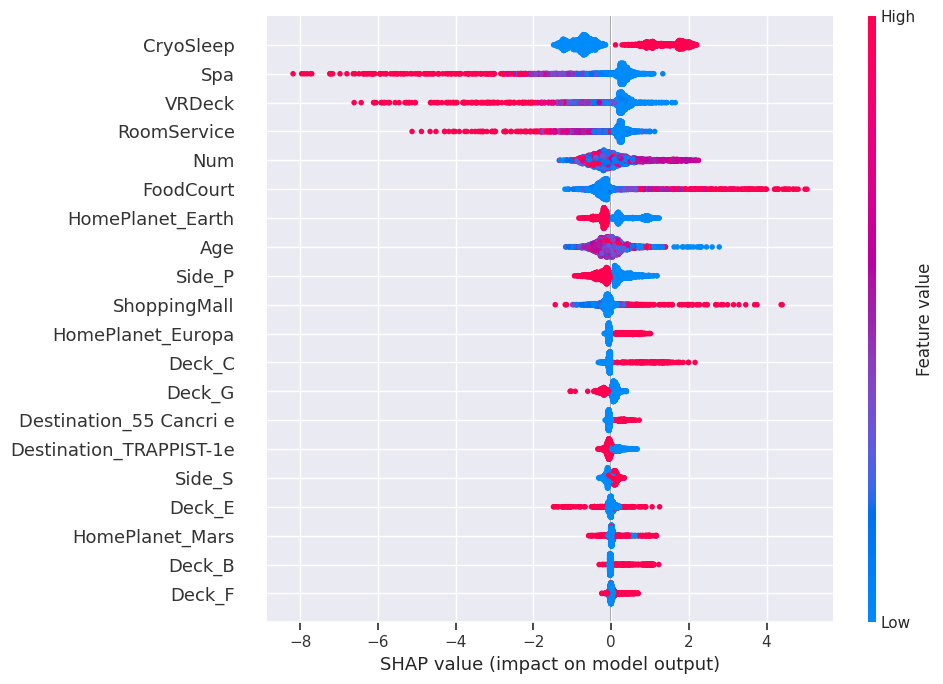

In [66]:
# Create a SHAP explainer
explainer = shap.Explainer(modelxgb1)

# Calculate SHAP values for the validation set
shap_values = explainer(X_val1)

# Summary plot
shap.summary_plot(shap_values, X_val1, plot_size=(10, 7))

## Decision Tree Classifier Model
By Meenakshi Rajesh

In [67]:
df_dt = df.copy()

In [68]:
X = df_dt.drop(['Transported'], axis=1)
y = df_dt['Transported']

In [69]:
# Splitting data for training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=45)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Decision Tree Classifier Accuracy: 0.7769
Confusion Matrix:
 [[649 258]
 [130 702]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       907
           1       0.73      0.84      0.78       832

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



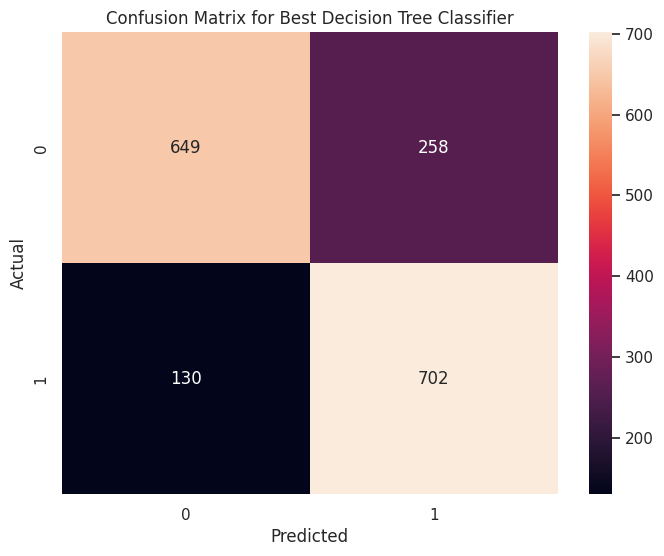

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data: impute missing values
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data: impute missing values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=45)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train_processed, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Make predictions on the validation data using the best estimator
y_pred_best_dt = best_dt.predict(X_val_processed)

# Calculate accuracy
accuracy_best_dt = accuracy_score(y_val, y_pred_best_dt)
print(f"Best Decision Tree Classifier Accuracy: {accuracy_best_dt:.4f}")

# Generate and display the confusion matrix
conf_matrix_best_dt = confusion_matrix(y_val, y_pred_best_dt)
print("Confusion Matrix:\n", conf_matrix_best_dt)

# Generate and display the classification report
class_report_best_dt = classification_report(y_val, y_pred_best_dt)
print("Classification Report:\n", class_report_best_dt)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt="d", cmap="rocket")
plt.title("Confusion Matrix for Best Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Preprocess the test data
test_data_processed = preprocessor.transform(test_df)

# Make predictions on the test data using the best estimator
y_pred_best_dt_test = best_dt.predict(test_data_processed)

# Creating file for submission
# Prepare the Kaggle submission file
submission_best_dt = pd.DataFrame({'PassengerId': test_df2['PassengerId'],
                                   'Transported': y_pred_best_dt_test})

# Convert 0s and 1s to "False" and "True"
submission_best_dt.replace({0: False, 1: True}, inplace=True)

# Write the dataFrame to a .csv file
submission_best_dt.to_csv('submission_Test_best_dt.csv', index=False)

# Download the .csv file
files.download("submission_Test_best_dt.csv")


###X-AI





In [71]:
# Initialize SHAP explainer for the best Decision Tree model
explainer = shap.TreeExplainer(best_dt)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train)

In [72]:
# Check the dimensions of SHAP values
print("SHAP values shape:", len(shap_values), shap_values[0].shape, shap_values[1].shape)
print("Training data shape:", X_train.shape)

SHAP values shape: 6954 (24, 2) (24, 2)
Training data shape: (6954, 24)


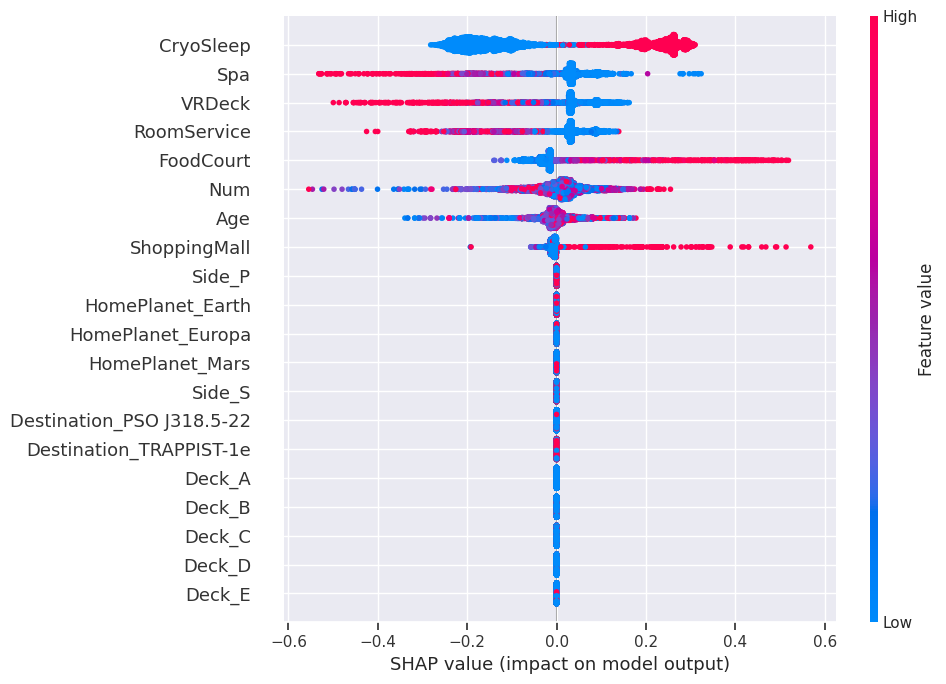

In [73]:
# Summary plot for feature importance
shap.summary_plot(shap_values[:,:,1], X_train, plot_size=(10, 7))

## Random Forest Model
By Anns Tomy

In [74]:
df_rf = df.copy()

In [75]:
X = df_rf.drop(['Transported'], axis=1)
y = df_rf['Transported']

In [76]:
# Splitting data for training
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=69)

In [77]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.79700977573318
Confusion Matrix:
[[717 148]
 [205 669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       865
           1       0.82      0.77      0.79       874

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [78]:
# Tesing on test file
# Make predictions on the test file
X_test = test_df.copy()
y_pred_rf_test = rf_model.predict(X_test)

# Prepare the Kaggle submission file
submission = pd.DataFrame({'PassengerId': test_df2['PassengerId'], 'Transported': y_pred_rf_test})
submission['Transported'] = submission['Transported'].astype(bool)  # Ensure the Transported column is boolean

# Ensure 0s and 1s are converted to "False" and "True"
submission.replace({0: False, 1: True}, inplace=True)

# Write the DataFrame to a .csv file
submission.to_csv('submission_Test_rf.csv', index=False)

# Download the .csv file
files.download('submission_Test_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 XAI for Random Forest

In [79]:
# Create a SHAP explainer for the random forest model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set using fewer reference values
shap_values = explainer.shap_values(X_test, approximate=True)

In [80]:
shap_values.shape

(4277, 24, 2)

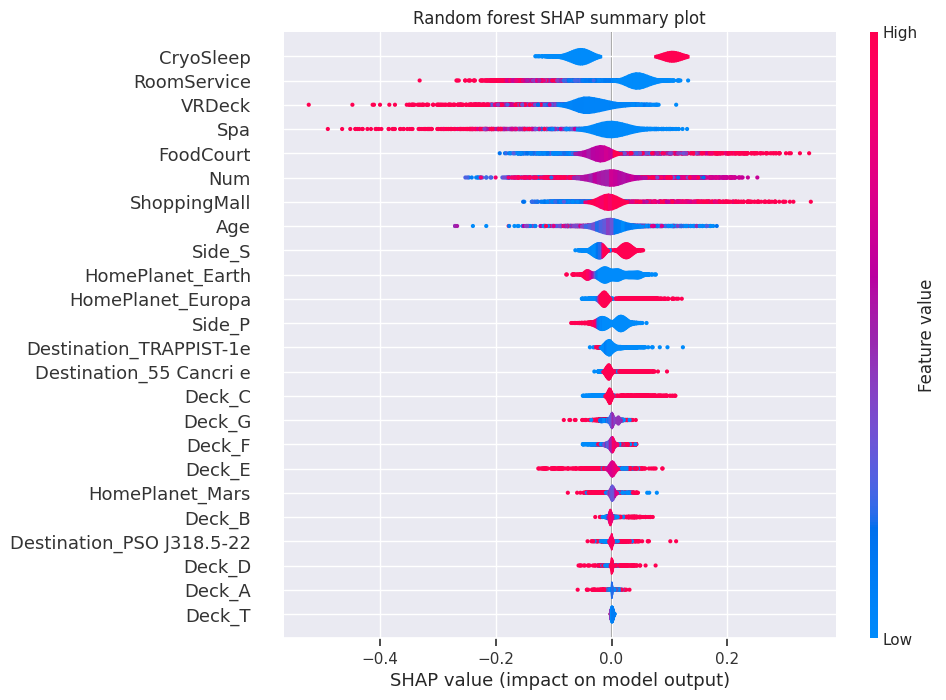

In [81]:
# Get the feature names
feature_names = X_test.columns

# Create a summary plot
shap.summary_plot(shap_values[:,:,1], features=X_test,
                  feature_names=feature_names, plot_type='violin',
                  plot_size=(10, 7), max_display=24, show=False)
plt.title('Random forest SHAP summary plot')
plt.show()

##Support Vector Classifier Model
By Bineeth Mathew


In [82]:
# Copying df
df_svc = df.copy()

In [83]:
# Prepare features and target variable
X = df_svc.drop(['Transported', 'Num'], axis=1)
y = df_svc['Transported']

In [84]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=69)


In [85]:
# Instantiate the SVC model
svc_model = SVC(probability=True)

# Fit the model to the training data
svc_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svc_model.predict(X_val)

In [86]:
# Calculate accuracy for SVC model
accuracy_svc = accuracy_score(y_val, y_pred)
print(f"SVC Accuracy: {accuracy_svc:.4f}")

# Generate and display the confusion matrix
conf_matrix_svc = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix_svc)

SVC Accuracy: 0.7964
Confusion Matrix:
 [[663 202]
 [152 722]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       865
           1       0.78      0.83      0.80       874

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



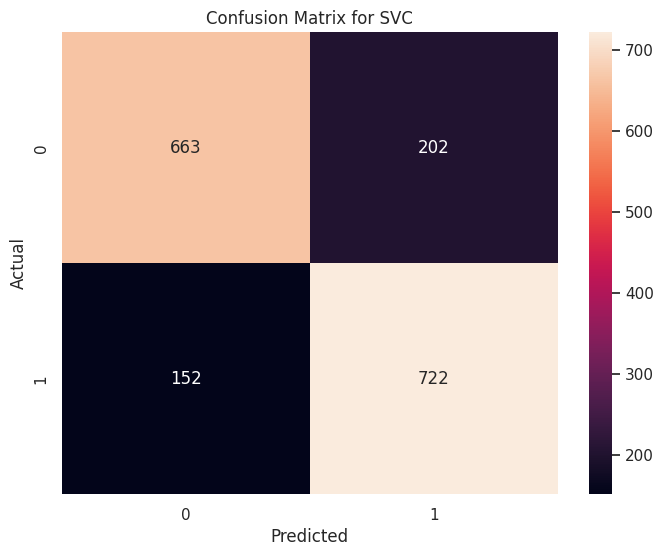

In [87]:
# Generate and display the classification report
class_report_svc = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report_svc)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="rocket")
plt.title("Confusion Matrix for SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   RoomService                4277 non-null   float64
 3   FoodCourt                  4277 non-null   float64
 4   ShoppingMall               4277 non-null   float64
 5   Spa                        4277 non-null   float64
 6   VRDeck                     4277 non-null   float64
 7   Num                        4277 non-null   int64  
 8   HomePlanet_Earth           4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   int64  
 10  HomePlanet_Mars            4277 non-null   int64  
 11  Destination_55 Cancri e    4277 non-null   int64  
 12  Destination_PSO J318.5-22  4277 non-null   int64  
 13  Destination_TRAPPIST-1e    4277 non-null   int64

In [89]:
test_svc = test_df.drop(['Num'], axis=1)

In [90]:
# Make predictions on the test file
y_pred_svc_test = svc_model.predict(test_svc)
print("Predictions on test data:\n", y_pred_svc_test)

# Prepare the Kaggle submission file
submission_dt = pd.DataFrame({'PassengerId': test_df2['PassengerId'],
                              'Transported': y_pred_svc_test})

# Convert 0s and 1s to "False" and "True"
submission_dt.replace({0: False, 1: True}, inplace=True)

# Write the dataFrame to a .csv file
submission_dt.to_csv('submission_Test_dt.csv', index=False)

# Download the .csv file
files.download("submission_Test_dt.csv")

Predictions on test data:
 [1 0 1 ... 1 1 1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### XAI

In [91]:
df_svc.columns

Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Num', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S'],
      dtype='object')

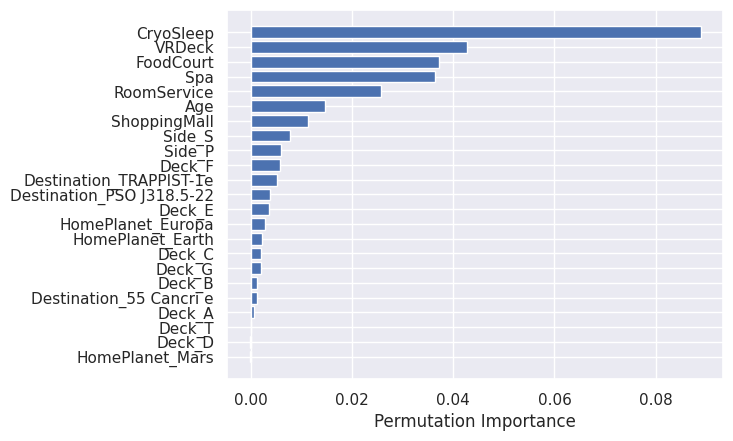

In [92]:
importances = permutation_importance(svc_model, X_val, y_val,
                                     n_repeats=9, random_state=69)
sorted_idx = importances.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], importances.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [93]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X.columns,
                                                   class_names=['Not Transported', 'Transported'],
                                                   discretize_continuous=True)
i = 0  # index of the instance to explain
exp = explainer.explain_instance(X_val.values[i], svc_model.predict_proba)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



## Logistic regression model
By Aaron M Joseph

In [94]:
df_logreg = df.copy()

In [95]:
df_logreg.head()

CryoSleep       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0          0  0.702095    -0.337025  -0.284274     -0.287317 -0.273736   
1          0 -0.333233    -0.173528  -0.278689     -0.245971  0.209267   
2          0  2.013510    -0.272527   1.934922     -0.287317  5.634034   
3          0  0.287964    -0.337025   0.511931      0.326250  2.655075   
4          0 -0.885407     0.117466  -0.240833     -0.037590  0.223344   

     VRDeck  Transported  Num  HomePlanet_Earth  ...  Deck_A  Deck_B  Deck_C  \
0 -0.266098            0    0             False  ...   False    True   False   
1 -0.227692            1    0              True  ...   False   False   False   
2 -0.223327            0    0             False  ...    True   False   False   
3 -0.097634            0    0             False  ...    True   False   False   
4 -0.264352            1    1              True  ...   False   False   False   

   Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0   False   False   False   False   False    True   False  
1   False   False    True   False   False   False    True  
2   False   False   False   False   False   False    True  
3   False   False   False   False   False   False    True  
4   False   False    True   False   False   False    True  

[5 rows x 25 columns]

In [96]:
df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   int64  
 8   Num                        8693 non-null   int64  
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

In [97]:
X_logreg = df_logreg.drop(['Transported'], axis=1)
y_logreg = df_logreg['Transported'].astype(int)

In [98]:
# Create and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=73)
logreg.fit(X_logreg, y_logreg)

LogisticRegression(max_iter=1000, random_state=73)

In [99]:
# Make predictions on the test set
y_pred = logreg.predict(X_logreg)

# Evaluate the model
accuracy = accuracy_score(y_logreg, y_pred)
conf_matrix = confusion_matrix(y_logreg, y_pred)
class_report = classification_report(y_logreg, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7923616703094444
Confusion Matrix:
[[3327  988]
 [ 817 3561]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



In [100]:
test_logreg = test_df.copy()

In [101]:
test_logreg.head()

CryoSleep       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0          1 -0.116957    -0.361266  -0.287719     -0.316173 -0.271297   
1          0 -0.681236    -0.361266  -0.281826     -0.316173  2.255891   
2          1  0.165182    -0.361266  -0.287719     -0.316173 -0.271297   
3          0  0.658927    -0.361266   4.067167     -0.316173 -0.109263   
4          0 -0.610702    -0.344790  -0.287719      0.816230 -0.271297   

     VRDeck  Num  HomePlanet_Earth  HomePlanet_Europa  ...  Deck_A  Deck_B  \
0 -0.249197    3                 1                  0  ...       0       0   
1 -0.249197    4                 1                  0  ...       0       0   
2 -0.249197    0                 0                  1  ...       0       0   
3  0.219987    1                 0                  1  ...       0       0   
4 -0.249197    5                 1                  0  ...       0       0   

   Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0       0       0       0       0       1       0       0       1  
1       0       0       0       1       0       0       0       1  
2       1       0       0       0       0       0       0       1  
3       1       0       0       0       0       0       0       1  
4       0       0       0       1       0       0       0       1  

[5 rows x 24 columns]

In [102]:
test_logreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   RoomService                4277 non-null   float64
 3   FoodCourt                  4277 non-null   float64
 4   ShoppingMall               4277 non-null   float64
 5   Spa                        4277 non-null   float64
 6   VRDeck                     4277 non-null   float64
 7   Num                        4277 non-null   int64  
 8   HomePlanet_Earth           4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   int64  
 10  HomePlanet_Mars            4277 non-null   int64  
 11  Destination_55 Cancri e    4277 non-null   int64  
 12  Destination_PSO J318.5-22  4277 non-null   int64  
 13  Destination_TRAPPIST-1e    4277 non-null   int64

In [103]:
try:
  X_test_logreg = test_logreg.drop(['PassengerId'], axis=1)
except KeyError:
  X_test_logreg = test_logreg

pred_logreg = logreg.predict(X_test_logreg)

In [104]:
output = pd.DataFrame({'PassengerId': test_df2.PassengerId,
                       'Transported': pred_logreg})

output['Transported'] = output['Transported'].astype(bool)
output.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [105]:
output.to_csv('submission_logreg.csv', index=False)

### X-AI

In [106]:
background = shap.maskers.Independent(X_test_logreg, max_samples=100)
explainer = shap.Explainer(logreg, background)
shap_values = explainer(X_test_logreg)

# Ensure the feature names are correctly passed
feature_names = X_test_logreg.columns

In [107]:
shap_values.shape

(4277, 24)

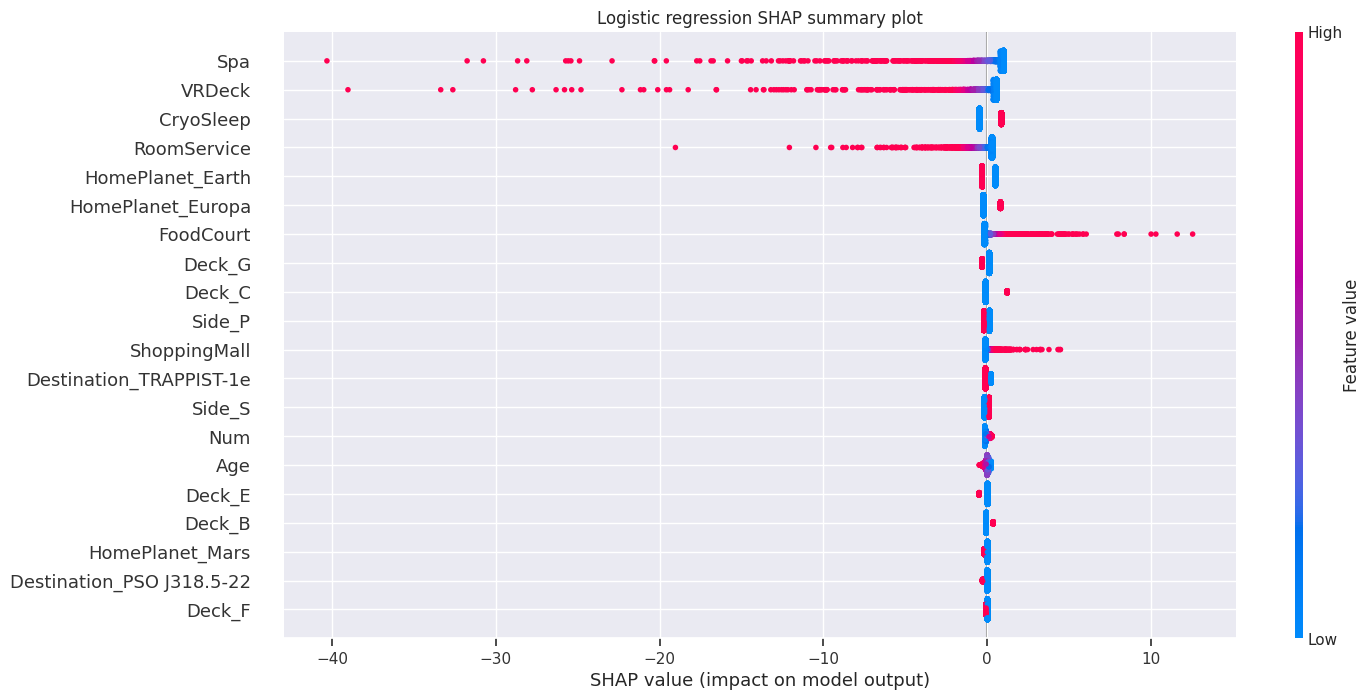

In [108]:
# Summary plot
shap.summary_plot(shap_values, X_test_logreg, feature_names=feature_names,
                  plot_size=(15, 7), show=False)
plt.title('Logistic regression SHAP summary plot')
plt.show()

## K-NN Classifier model
By Dhanya Davis

In [109]:
df_knn = df.copy()
X = df_knn.drop(['Transported'], axis=1)
y = df_knn['Transported']
# Splitting data for training
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=69)
# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the KNN classifier
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
report = classification_report(y_val, y_pred)
print('Classification Report:')
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

X_test = test_df.copy()

# Make predictions on the test set
y_pred_knn_test = knn_model.predict(X_test)

# Prepare the Kaggle submission file
submission = pd.DataFrame({'PassengerId': test_df2['PassengerId'],
                           'Transported': y_pred_knn_test})
submission['Transported'] = submission['Transported'].astype(bool)
# Ensure 0s and 1s are converted to "False" and "True"
submission.replace({0: False, 1: True}, inplace=True)

# Write the DataFrame to a .csv file
submission.to_csv('submission_Test_knn.csv', index=False)

# Download the .csv file
files.download('submission_Test_knn.csv')


Accuracy: 0.6475
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       865
           1       0.64      0.68      0.66       874

    accuracy                           0.65      1739
   macro avg       0.65      0.65      0.65      1739
weighted avg       0.65      0.65      0.65      1739

Confusion Matrix:
[[536 329]
 [284 590]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>